# Midterm T2 2016

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Easy Zone (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

## 2) Bisection

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

### 3 Newton's Method

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{2}{x_n}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

### 4 Legendre

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

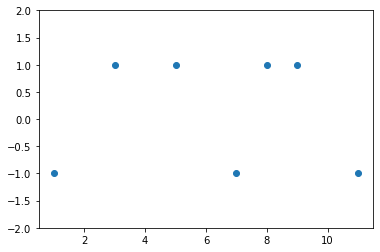

In [2]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

### 5 Integration

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


### 6 Derivative

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

Text(0.8, 0.5, '$\\bar{x}$')

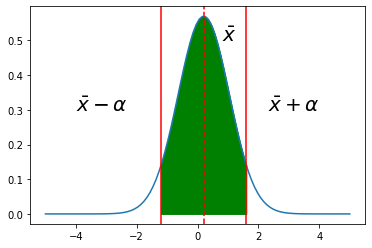

In [3]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)



plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)


##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

a: 25.41351318359375
Range: between -24.41351318359375 and 26.41351318359375


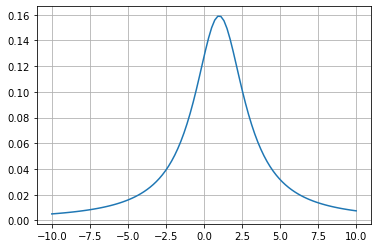

In [26]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return (1./(math.pi*gamma))*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)
plt.grid()

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)

def trapezoid(f, a, b, n):
    h = abs(b-a)/n
    res = 0
    for i in range(1,n):
        res += f(a+i*h)
    return (h/2)*(f(a) + f(b) + 2*res)

def confidence(a):
    return trapezoid(cauchy, -a+1, a+1, 100) - 0.95


a = bisection(confidence, 0, 100,0.001)
print("a:", a)
print("Range: between", 1-a, "and", 1+a)

### 8 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre polynomial to find it.

#### Problem


Use what you learn about Legendre Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (NOT $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.